## <center>NBA Analytics Data Analysis Project<center>
### <center>Addendum: Corrections to Data Visualizations<center>  
    
#### <center>presented by Brian Zamkotowicz for Springboard Capstone Project<center>

In the course of my research into NBA statstics and the predictive effectiveness of specific advanced metrics, I had the opportunity to work with a great deal of data and make a number of discoveries.  Through the use of inferential statistics, I was able to notice a pattern that seemed unusual, and by diving back into some data points that appeared to be outliers, I realized that the pattern was caused by a flaw in the data that had been overlooked.  While NBA seasons are normally 82 games, one of the seasons I had examined was only 66 games (2012) because of a lockout that led to work stoppage.  This caused the win totals in 2012 to be lower and the changes in wins (Win_Delta) to be higher in 2013.  I instituted a simple workaround by normalizing the data for all seasons to 82 games.  Since this discovery was made after some of the data visualizations were already presented, this notebook will simply provide corrections to those.

In [18]:
import pandas as pd
hoops_data = pd.read_pickle('C://Users/Home Office/hoops_data.pickle')
hoops2 = pd.read_pickle('C://Users/Home Office/Desktop/Springboard/hoops2.pickle')
hoops2.head(2)

,Tm,Year,Age,BPM_A,WORP,VORP,PER,WORP_Chg,VORP_Chg,BPM_A_Chg,PER_Chg,ABBR,YR,W,Win_Delta,Adj_Wins,Prev_W
1,ATL,2012,28.666667,-1.026931,26.987068,9.8,222.3,-16.833053,-6.8,-4.798933,-1.8,ATL,2012,40,6.0,50.0,44.0
2,ATL,2013,26.888889,-2.037678,28.595704,10.7,245.5,1.608636,0.9,-1.010747,23.2,ATL,2013,44,-6.0,44.0,50.0


In [37]:
hoops_data = hoops_data.dropna()


In [38]:
hoops_data['prev_wins'] = hoops_data['W']- hoops_data['Win_Delta']
hoops_data.head(2)

C:\Conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Tm,Year,Age,BPM_A,WORP,VORP,PER,WORP_Chg,VORP_Chg,BPM_A_Chg,PER_Chg,ABBR,YR,W,Win_Delta,prev_wins
1,ATL,2012,28.666667,-1.026931,26.987068,9.8,222.3,-16.833053,-6.8,-4.798933,-1.8,ATL,2012,40,-4.0,44.0
2,ATL,2013,26.888889,-2.037678,28.595704,10.7,245.5,1.608636,0.9,-1.010747,23.2,ATL,2013,44,4.0,40.0


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_context("talk")


Because Win_Delta was adjusted to reflect adjusted wins, the normalized 2012 win totals, the regression plots below have changed slightly from the originals. 

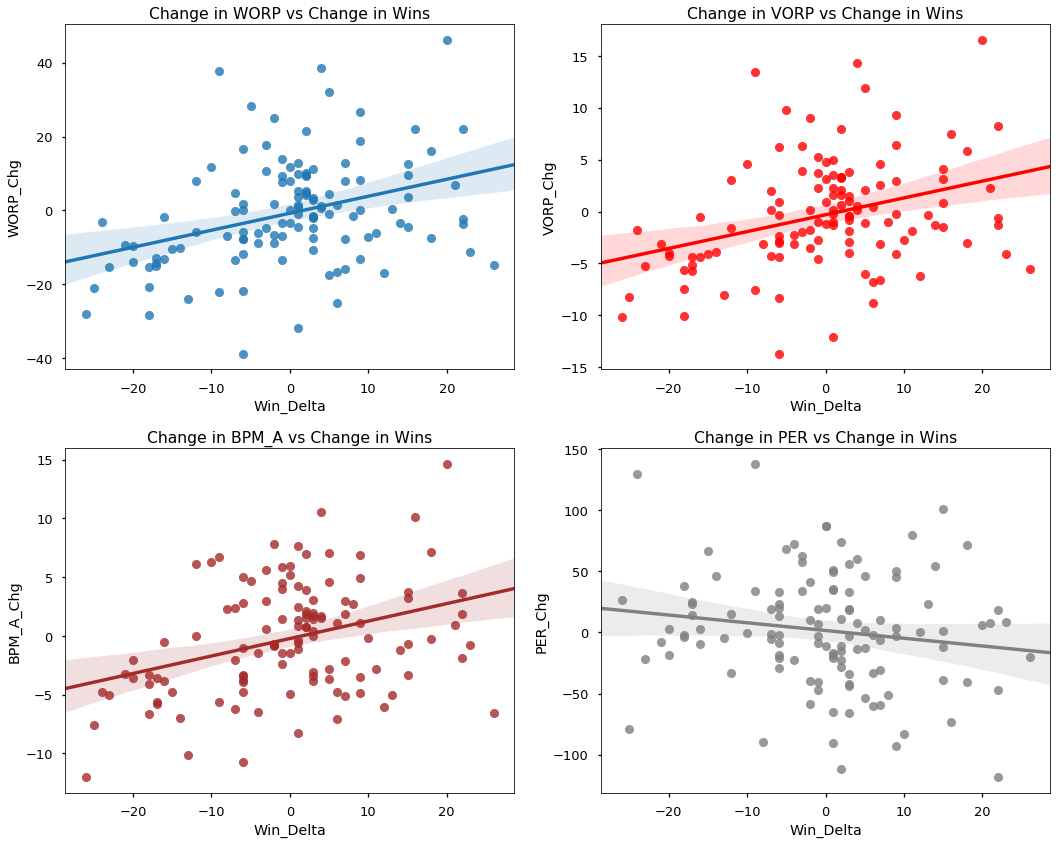

In [10]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(15)

ax1 = fig.add_subplot (2,2,1)
sns.regplot(y="WORP_Chg", x="Win_Delta", data=hoops2, fit_reg = True)
plt.title ('Change in WORP vs Change in Wins')

ax2 = fig.add_subplot (2,2,2)
sns.regplot(y="VORP_Chg", x="Win_Delta", data=hoops2, fit_reg = True, color = 'red')
plt.title ('Change in VORP vs Change in Wins')

ax3 = fig.add_subplot(2, 2, 3)
sns.regplot(y="BPM_A_Chg", x="Win_Delta", data=hoops2, fit_reg = True, color = 'brown')
plt.title ('Change in BPM_A vs Change in Wins')

ax4 = fig.add_subplot(2, 2, 4)
sns.regplot(y="PER_Chg", x="Win_Delta", data=hoops2, fit_reg = True, color = 'gray')
plt.title ('Change in PER vs Change in Wins')

plt.tight_layout()

A previous examination of the distribution of wins and Win_Delta was also affected by the 2012 data.  In particular the distribution plot of Win_Delta shows that the vast majority of teams performed similarly to the previous season.

C:\Conda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


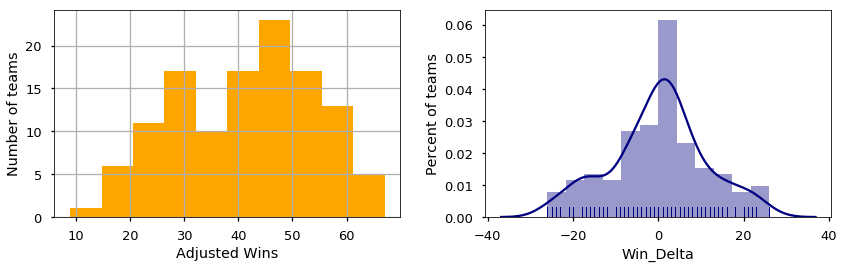

In [11]:
fig = plt.figure()

ax1 = fig.add_subplot (1,2,1)
plt.ylabel('Number of teams')
plt.xlabel('Adjusted Wins')
hoops2['Adj_Wins'].hist(figsize = [12,4], color = 'orange')

ax3 = fig.add_subplot (1,2,2)
plt.ylabel('Percent of teams')
plt.xlabel('Win Delta')
sns.distplot(hoops2['Win_Delta'], kde = True, rug = True, color = 'navy', bins = 12)
plt.tight_layout()

Text(0.5,1,'Win Delta vs Normalized Wins')

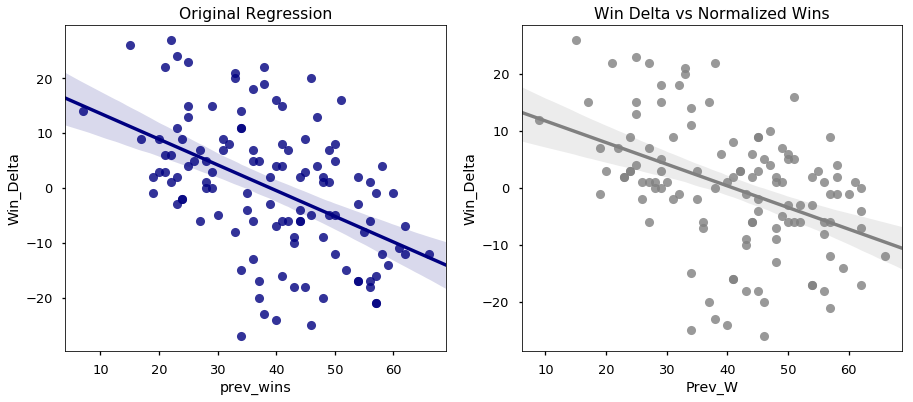

In [58]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(15)
#plt.title('Change in Wins by Previous Year Win Total')

ax1 = fig.add_subplot (1,2,1)
sns.regplot(x ="prev_wins", y="Win_Delta", data=hoops_data, fit_reg = True, color = 'navy')
plt.title('Original Regression')


ax3 = fig.add_subplot (1,2,2)
sns.regplot(x ="Prev_W", y="Win_Delta", data=hoops2, fit_reg = True, color = 'grey')
plt.title('Win Delta vs Normalized Wins')



The regression plots above show that normalizing the 2012 data made the regression line slightly more horizontal, meaning that previous season wins were less of a factor than originally thought.


The heatmap I had generated was also influenced by having a 66 game season.  The heatmap using the normalized data is shown below.

In [62]:
hoops1 = hoops2.drop(columns = ['Tm', 'Year', 'ABBR', 'YR', 'W'])

Text(0.5,1,'Heatmap of Pearson Correlation Coefficients')

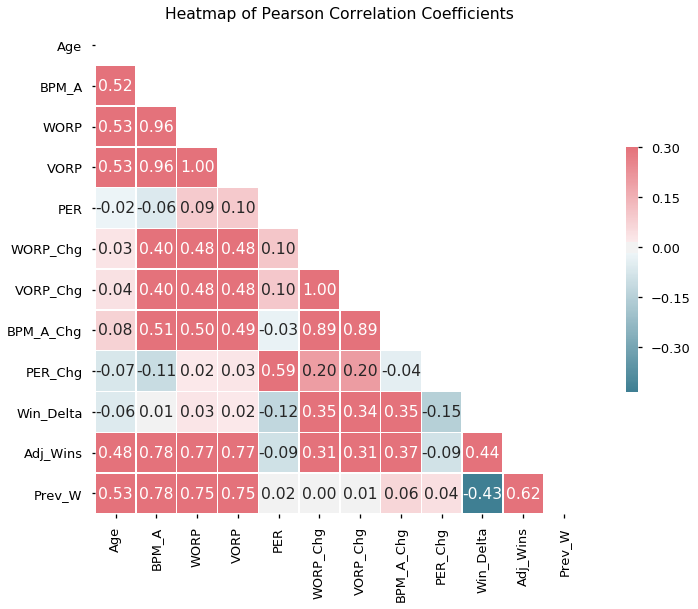

In [88]:
import numpy as np

# Compute the correlation matrix
corr = hoops1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, fmt = ".2f",
            square=True, linewidths= .5, cbar_kws={"shrink": .5}, annot = True)
plt.title('Heatmap of Pearson Correlation Coefficients')

Normalizing the data for 2012 definitely had an effect on a number of the visualizations I had built early on.  By using solid analysis techniques throughout the remainder of the project I was able to not only identify an unusual pattern, but also to search out its source.  When it was found to be an error in the handling of the data it was corrected, and the project was able to move on a planned.

Text(0.5,1,'Swarmplot of Win Totals by Age')

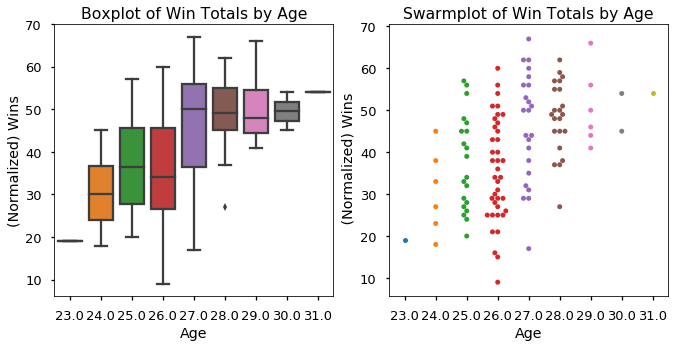

In [96]:
hoops3 = hoops2.copy()
hoops3['Age']= hoops2['Age'].round(0)

plt.rcParams['figure.figsize']=(11,5)
fig = plt.figure()

ax1 = fig.add_subplot (1,2,1)
sns.boxplot(x = 'Age', y = 'Adj_Wins', data = hoops3)
plt.ylabel('(Normalized) Wins')
plt.title('Boxplot of Win Totals by Age')

ax2 = fig.add_subplot(1,2,2)
sns.swarmplot(x = 'Age', y = 'Adj_Wins', data = hoops3)
plt.ylabel(' (Normalized) Wins')
plt.title('Swarmplot of Win Totals by Age')

I am also including the ammended regression plot on its own, as that will be the included in the final report.

Text(0.5,1,'Win Delta vs Normalized Wins')

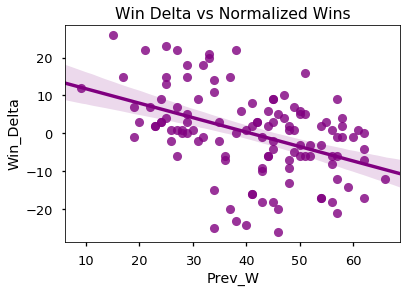

In [60]:
sns.regplot(x ="Prev_W", y="Win_Delta", data=hoops2, fit_reg = True, color = 'purple')
plt.title('Win Delta vs Normalized Wins')